In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\Amber singh\Downloads\Projects files 1-10\Project 1712\Project 7\Parkinsson disease.csv')

In [3]:
pd.set_option('display.max_columns',24)

In [4]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [6]:
df['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [50]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [12]:
df1=df.select_dtypes(include='float')

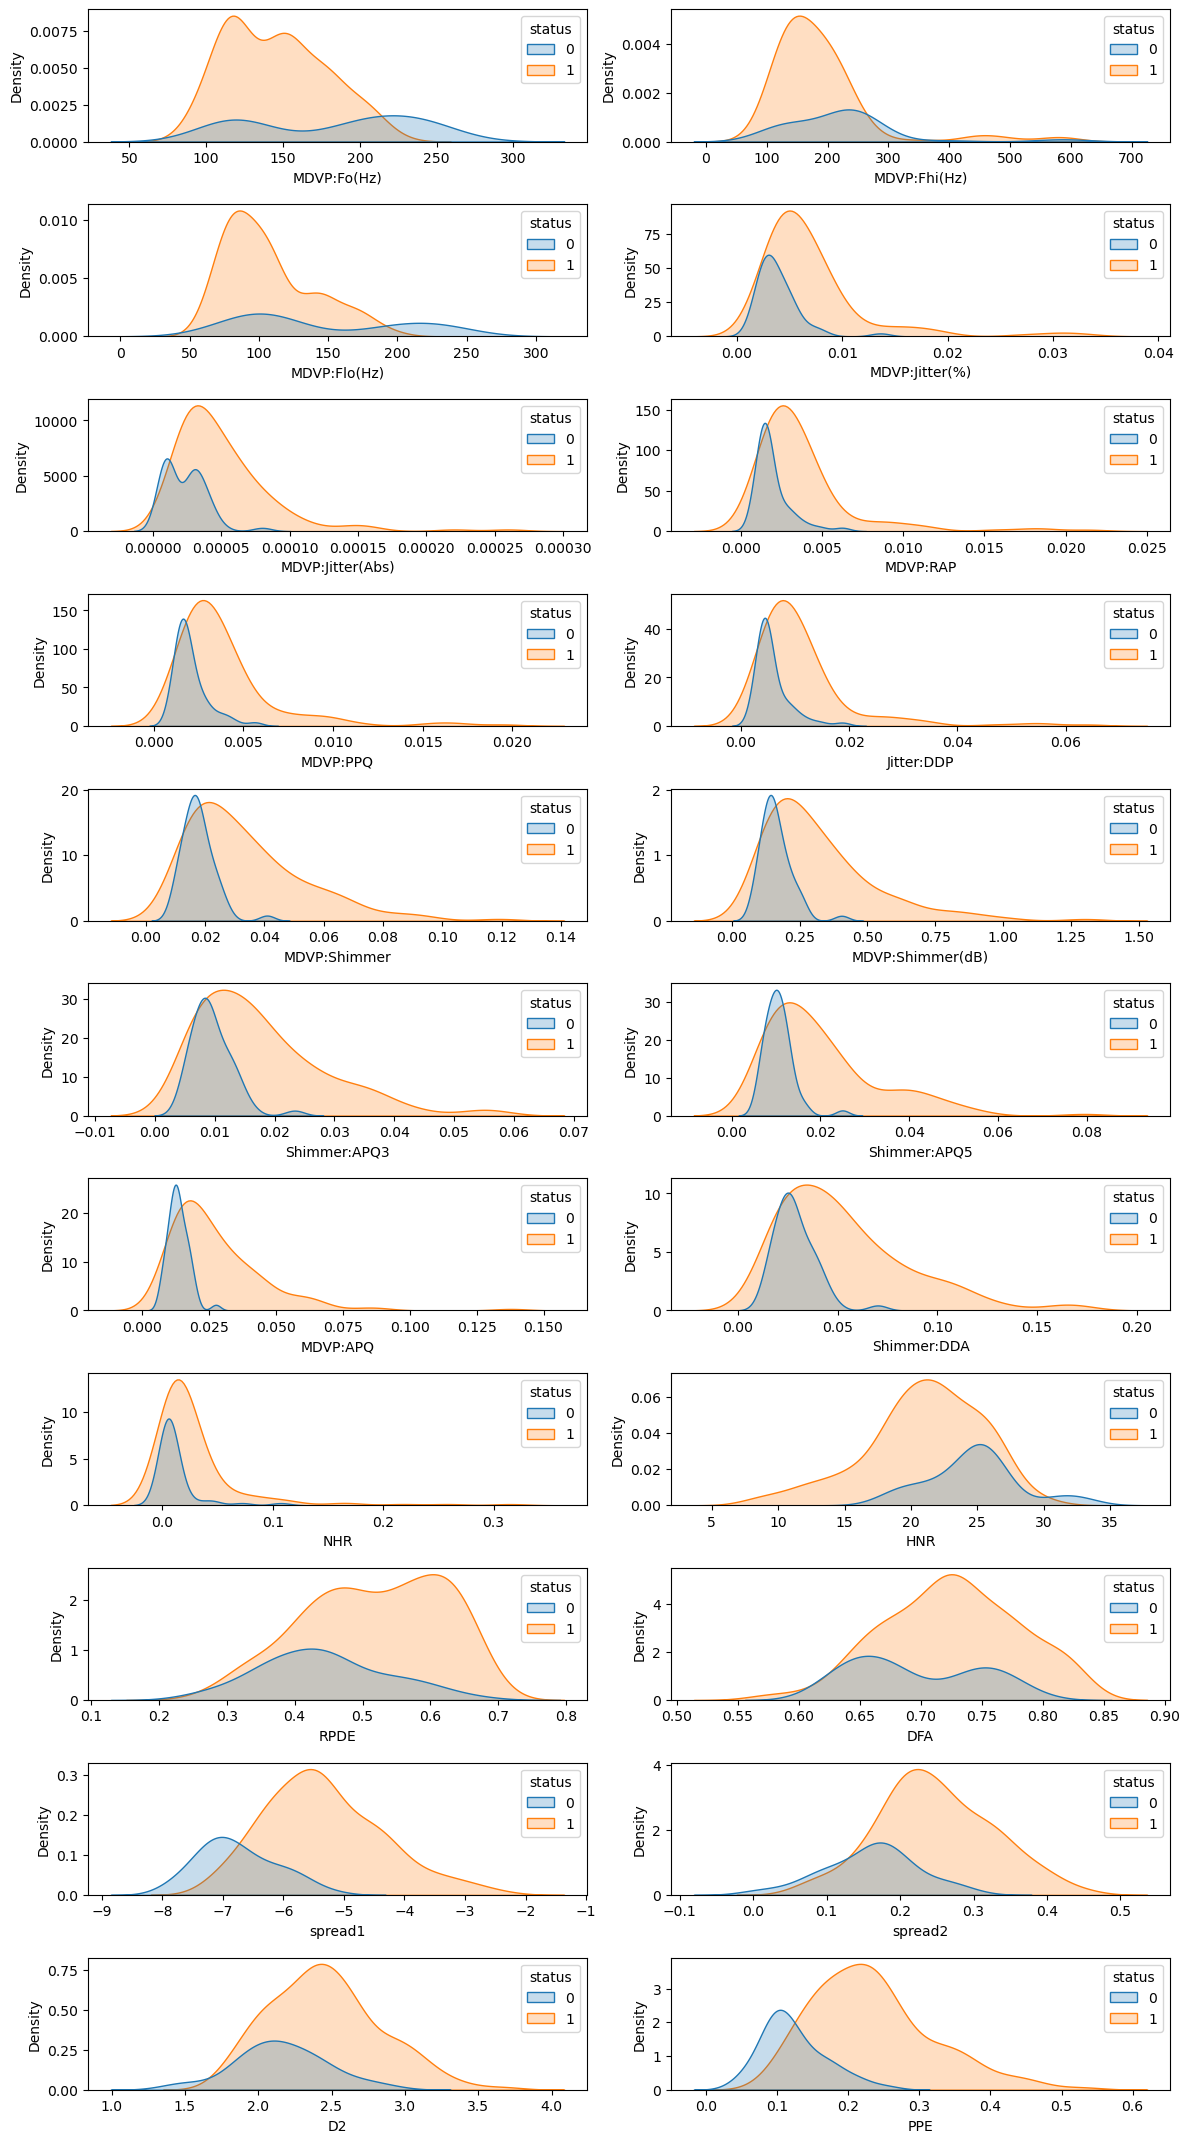

In [57]:
plt.figure(figsize=(12,25))
for i,col in enumerate(df1):
    plt.subplot(13,2,i+1)
    sns.kdeplot(data=df,x=col,hue='status',fill=True)
    plt.tight_layout()

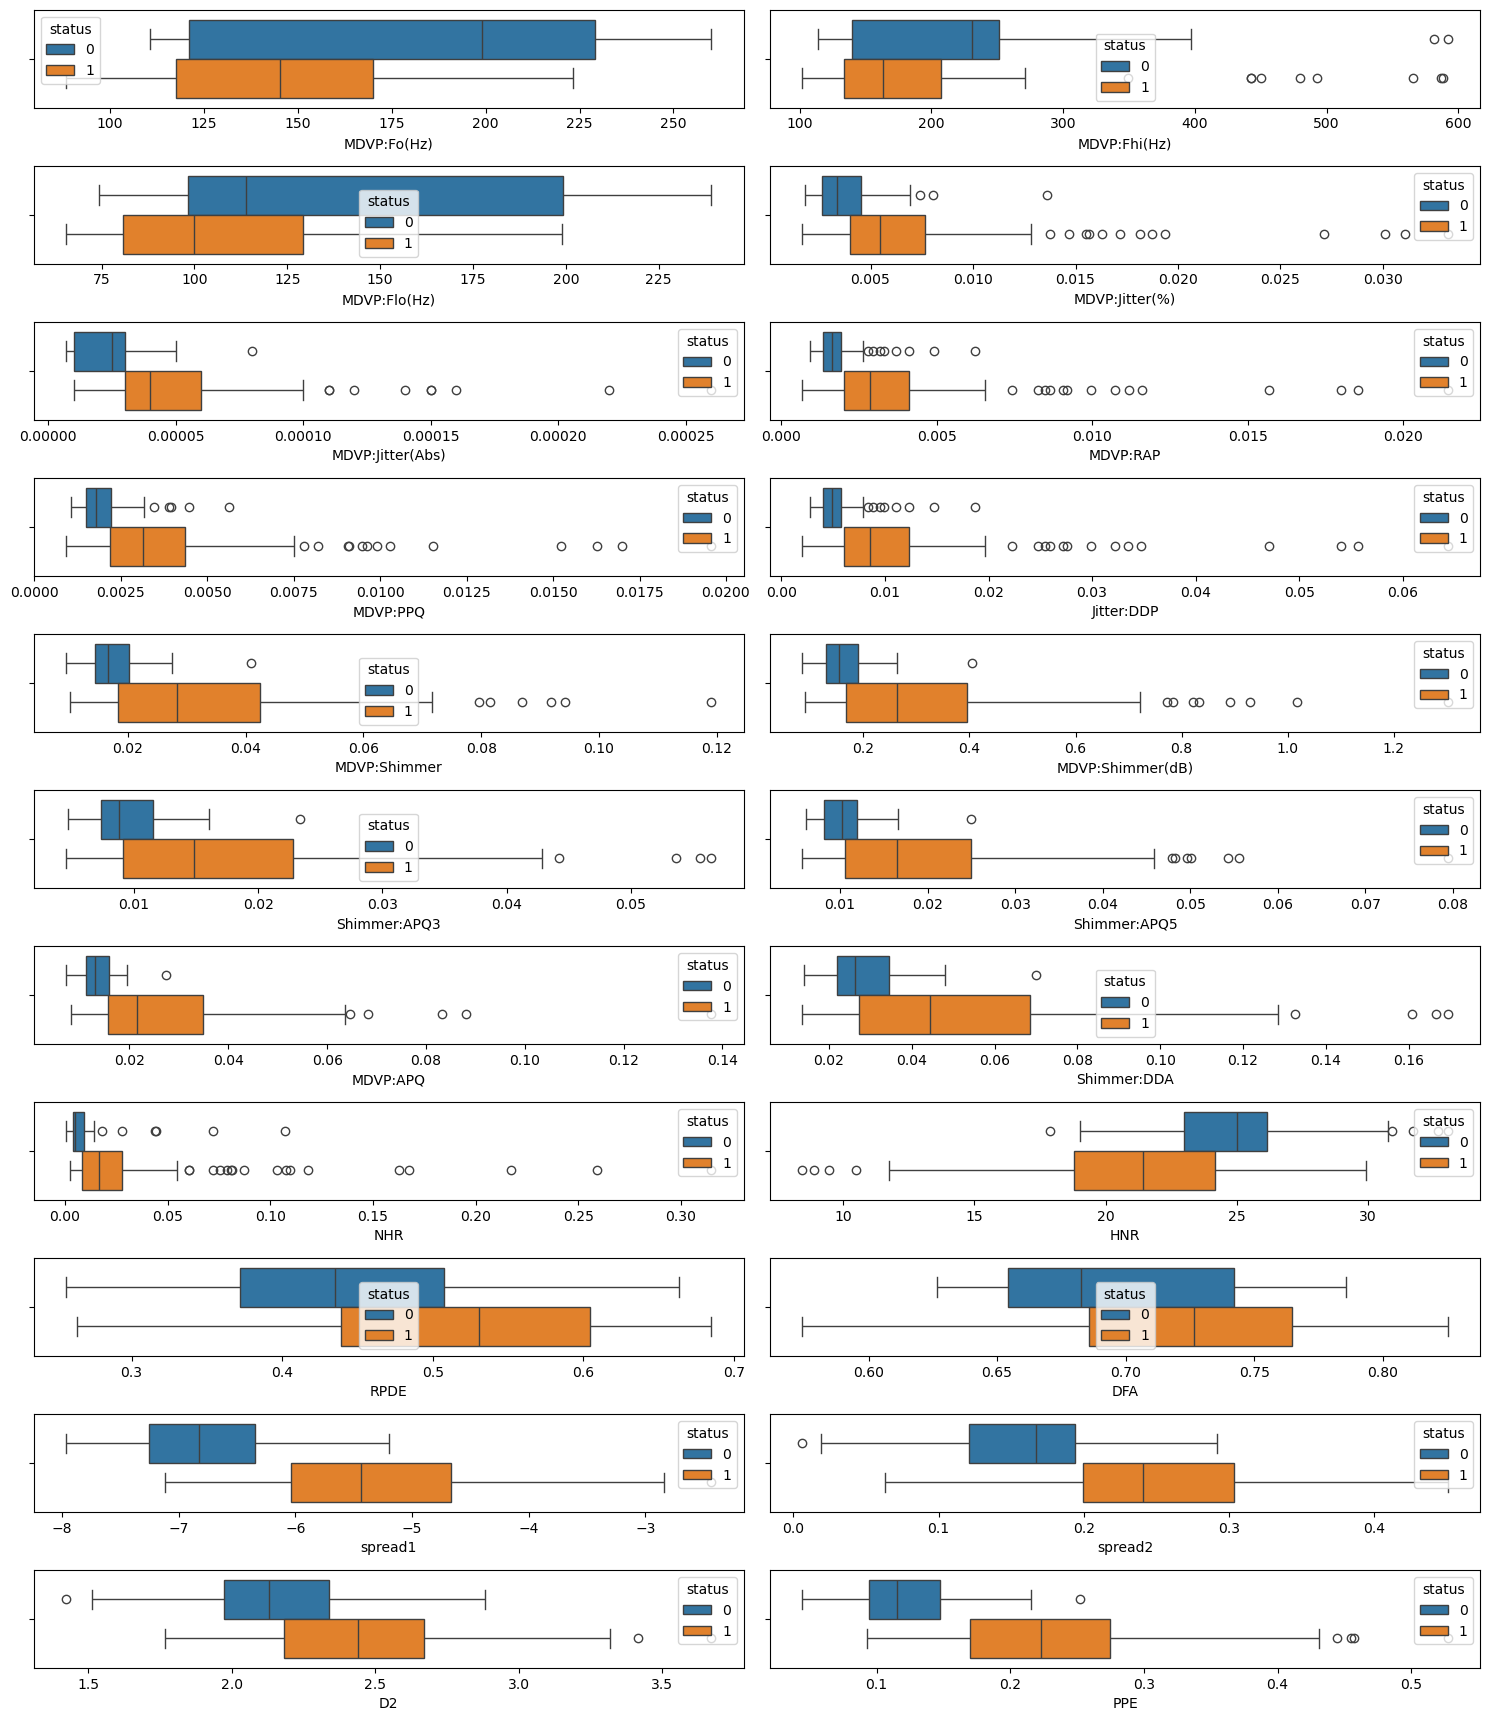

In [94]:
plt.figure(figsize=(15,20))
for i,col in enumerate(df1):
    plt.subplot(13,2,i+1)
    sns.boxplot(data=df,x=col,hue='status',vert=False)
    plt.tight_layout()

In [32]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [39]:
x=df.drop(columns=['name','status'])
y=df['status']

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [97]:
models=[LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(),GaussianNB(),KNeighborsClassifier()]

In [98]:
for i,models in enumerate(models):
    models.fit(x_train,y_train)
    pred=models.predict(x_test)
    print(models)
    print(accuracy_score(y_test,pred))
    print(classification_report(y_test,pred))
    print()

LogisticRegression()
0.7948717948717948
              precision    recall  f1-score   support

           0       0.83      0.62      0.71        16
           1       0.78      0.91      0.84        23

    accuracy                           0.79        39
   macro avg       0.81      0.77      0.78        39
weighted avg       0.80      0.79      0.79        39


RandomForestClassifier()
0.8717948717948718
              precision    recall  f1-score   support

           0       0.92      0.75      0.83        16
           1       0.85      0.96      0.90        23

    accuracy                           0.87        39
   macro avg       0.88      0.85      0.86        39
weighted avg       0.88      0.87      0.87        39


DecisionTreeClassifier()
0.8461538461538461
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        16
           1       0.84      0.91      0.88        23

    accuracy                           0.85        3

In [59]:
from sklearn.model_selection import KFold,LeaveOneOut,ShuffleSplit,cross_val_score


In [66]:
import warnings
warnings.filterwarnings('ignore')

In [69]:
for i,models in enumerate(models):
    scores=cross_val_score(estimator=models,X=x,y=y,cv=KFold(10))
    print(models)
    print(scores)
    print(scores.mean())
    print()

LogisticRegression()
[0.95       0.9        0.65       1.         1.         0.78947368
 0.89473684 1.         0.68421053 0.36842105]
0.8236842105263158

RandomForestClassifier()
[0.9        0.65       0.7        0.9        1.         0.78947368
 0.89473684 1.         0.68421053 0.36842105]
0.7886842105263158

DecisionTreeClassifier()
[0.9        0.55       0.75       0.8        0.95       0.89473684
 0.89473684 0.73684211 0.52631579 0.36842105]
0.7371052631578947

GaussianNB()
[0.65       0.55       0.9        0.75       0.95       0.36842105
 0.47368421 0.89473684 0.94736842 0.26315789]
0.6747368421052633

KNeighborsClassifier()
[0.9        0.7        0.7        0.7        1.         0.63157895
 0.78947368 0.84210526 0.63157895 0.31578947]
0.7210526315789474



In [76]:
from sklearn.metrics import roc_curve,roc_auc_score

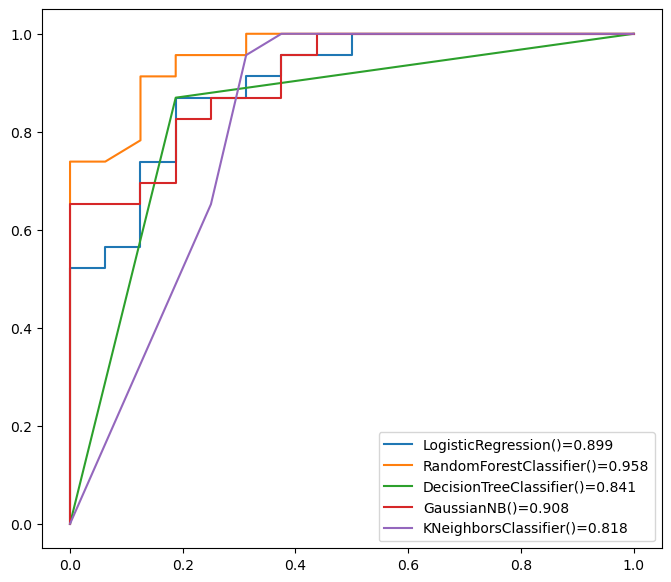

In [92]:
plt.figure(figsize=(8,7))
for i in models:
    i.fit(x_train,y_train)
    pred=i.predict_proba(x_test)[:,1]
    fpr,tpr,threshold=roc_curve(y_test,pred)
    auc=roc_auc_score(y_test,pred).round(3)
    plt.plot(fpr,tpr,label=f'{i}={auc}')
    plt.legend()